<a href="https://colab.research.google.com/github/jerrymart/Machine-Learning-Projects/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Team Members:

Joseph Mart (Project Lead)- A00732897

Callitus Obunadike - A00756855

Github: https://github.com/jerrymart/Machine-Learning-Projects/blob/main/Project2.ipynb

Project description:

Particulate matter (PM2:5) is an air pollutant that has an aerodynamic diameter of less than
or equal to 2.5 micrometers, which is hazardous to health when its levels are above certain
range. These small particles can absorb a variety of chemical components, including met-
als, salts, poisons, organic compounds and biological groups like pollens. The prediction of
ground level PM2:5 is challenging, as it behaves randomly over time and is aected by other
pollutants. To maintain a healthy environment, it is essential to predict the PM2:5 with great
accuracy.
This work focuses on the prediction of the air-pollutant PM2:5 based on the several meteoro-
logical and air-pollutant variables in the air. The data set were collected from the Texas Com-
mission on Environmental Quality's (TCEQ) ground stations. Data from dierent monitoring
stations of the Paso del Norte area were used to calculate hourly average PM concentrations
at ground level.

Linear regression will be used to predict a PM2.5 values based on the other variables in the
air. 

In [3]:
# Packages / libraries
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

#sns.set(rc={'figure.figsize':(12,10)})

In [4]:
df = pd.read_csv('/content/PM2.5-data.csv')

In [ ]:
df.head()

,NitricOxide,NitrogenDioxide,OxidesofNitrogen,Ozone,WindSpeed,ResultantWindSpeed,ResultantWindDirection,MaximumWindGust,Std.Dev.WindDirection,OutdoorTemperature,DewPointTemperature,RelativeHumidity,SolarRadiation,PM2.5
0,19.6,35.8,55.5,2,1.9,1.5,215,3.6,39,67.7,23.3,18.6,0.000,37.1
1,2.5,2.8,4.4,37,23.3,22.6,276,38.5,14,86.4,32.3,14.5,1.110,40.9
2,2.3,3.1,4.5,41,23.7,23.2,281,40.4,12,87.2,30.2,12.9,0.841,36.7
3,1.9,3.0,4.1,42,25.0,24.7,282,41.9,10,86.7,29.0,12.5,0.509,36.4
4,0.4,7.1,8.1,50,25.1,24.7,283,42.3,9,59.6,13.2,16.1,0.450,65.9


**1. EDA analysis**

## (a) Obtain the histograms of both PM2.5 and the logarithm (natural base) of PM2.5
### and comment. Proceed with the log-transformed PM2.5 from this step on.

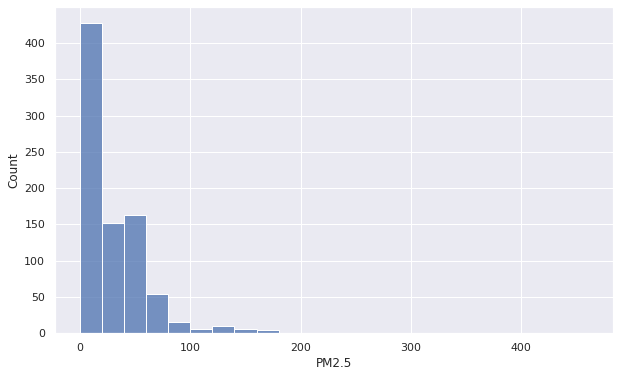

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x = 'PM2.5', binwidth = 20)

This happened to be uni-modal and righ-skewed
Predictive models don't do good job to this kind of distribution
We will try to get a normal distribution of this using log transform

In [5]:
#Log Transform of PM2.5

df['log_PM2.5'] = np.log(df['PM2.5'])

In [ ]:
df['log_PM2.5']

0      3.613617
1      3.711130
2      3.602777
3      3.594569
4      4.188138
         ...   
840    2.701361
841    2.406945
842    2.433613
843    2.312535
844    2.140066
Name: log_PM2.5, Length: 845, dtype: float64

In [6]:
#Delete PM2.5 Column

df1 = df.drop(columns = ['PM2.5'])

In [ ]:
#Inspect PM2.5 Columns
df1.head(2)

,NitricOxide,NitrogenDioxide,OxidesofNitrogen,Ozone,WindSpeed,ResultantWindSpeed,ResultantWindDirection,MaximumWindGust,Std.Dev.WindDirection,OutdoorTemperature,DewPointTemperature,RelativeHumidity,SolarRadiation,log_PM2.5
0,19.6,35.8,55.5,2,1.9,1.5,215,3.6,39,67.7,23.3,18.6,0.00,3.613617
1,2.5,2.8,4.4,37,23.3,22.6,276,38.5,14,86.4,32.3,14.5,1.11,3.711130


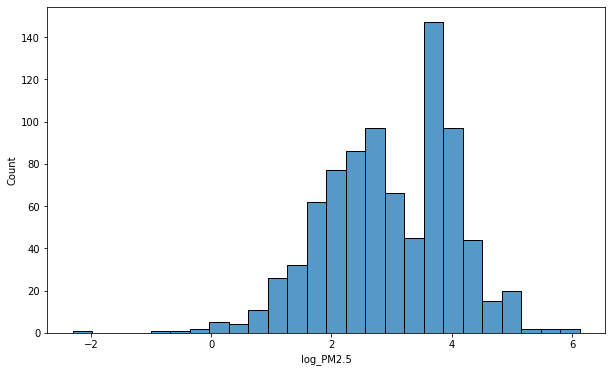

In [7]:
#Histogram of LogPM2.5

plt.figure(figsize=(10,6))
sns.histplot(data=df1,x = 'log_PM2.5')

This is a better distribution, that can benefit the predictive model

## (b) Inspect the data and answer these questions: Are there any missing data? Among
## all the predictors, how many of them are continuous, integer counts, and categorical,
### respectively?

In [ ]:
# Checking for Missing values

df1.isnull().sum()

NitricOxide               2
NitrogenDioxide           0
OxidesofNitrogen          1
Ozone                     0
WindSpeed                 0
ResultantWindSpeed        0
ResultantWindDirection    0
MaximumWindGust           0
Std.Dev.WindDirection     0
OutdoorTemperature        0
DewPointTemperature       0
RelativeHumidity          0
SolarRadiation            0
log_PM2.5                 0
dtype: int64

In [ ]:
# Visualize the NULL observations

df1[df1['NitricOxide'].isnull()]

,NitricOxide,NitrogenDioxide,OxidesofNitrogen,Ozone,WindSpeed,ResultantWindSpeed,ResultantWindDirection,MaximumWindGust,Std.Dev.WindDirection,OutdoorTemperature,DewPointTemperature,RelativeHumidity,SolarRadiation,log_PM2.5
25,NaN,14.0,14.0,59,10.1,9.7,282,17.1,16,82.9,13.0,7.2,0.0,4.044804
26,NaN,15.1,15.1,52,9.8,9.6,284,15.1,12,79.8,12.2,7.6,0.0,3.802208


There are few missing values


In [8]:
#Drop Missing Values

df1 = df1.dropna(subset = ['NitricOxide', 'OxidesofNitrogen'])

In [ ]:
type(df1)

pandas.core.frame.DataFrame

In [ ]:
#Check the new data

df1.isnull().sum()

NitricOxide               0
NitrogenDioxide           0
OxidesofNitrogen          0
Ozone                     0
WindSpeed                 0
ResultantWindSpeed        0
ResultantWindDirection    0
MaximumWindGust           0
Std.Dev.WindDirection     0
OutdoorTemperature        0
DewPointTemperature       0
RelativeHumidity          0
SolarRadiation            0
log_PM2.5                 0
dtype: int64

In [ ]:
# Investigate all the elements whithin each Feature 

for column in df1:
    unique_values = np.unique(df1[column])
    number_of_values = len(unique_values)
    if number_of_values <= 10:
        print("The number of distinct values for feature {} is: {} -- {}".format(column, number_of_values, unique_values))
    else:
        print("The number of distinct values for feature {} is: {}".format(column, number_of_values))

The number of distinct values for feature NitricOxide is: 283
The number of distinct values for feature NitrogenDioxide is: 327
The number of distinct values for feature OxidesofNitrogen is: 412
The number of distinct values for feature Ozone is: 65
The number of distinct values for feature WindSpeed is: 236
The number of distinct values for feature ResultantWindSpeed is: 233
The number of distinct values for feature ResultantWindDirection is: 270
The number of distinct values for feature MaximumWindGust is: 345
The number of distinct values for feature Std.Dev.WindDirection is: 70
The number of distinct values for feature OutdoorTemperature is: 444
The number of distinct values for feature DewPointTemperature is: 340
The number of distinct values for feature RelativeHumidity is: 424
The number of distinct values for feature SolarRadiation is: 347
The number of distinct values for feature log_PM2.5 is: 432


Continuous: All predictors are continuous

Integer counts: Ozone , Std.Dev.WindDirection

Categorical: Non is categorical

In [9]:
df1.shape

(842, 14)

### (c) Show a few interesting fndings about the data.

The log transform of the PM.25 is normally distributed

The unique number of occurence in each feature is just about the mean of total observations 

Some of the predictors exhibit outliers as shown in **2(e)by the boxplot**

Checking for Multicolinearity as follow

## Check Multicolinearity

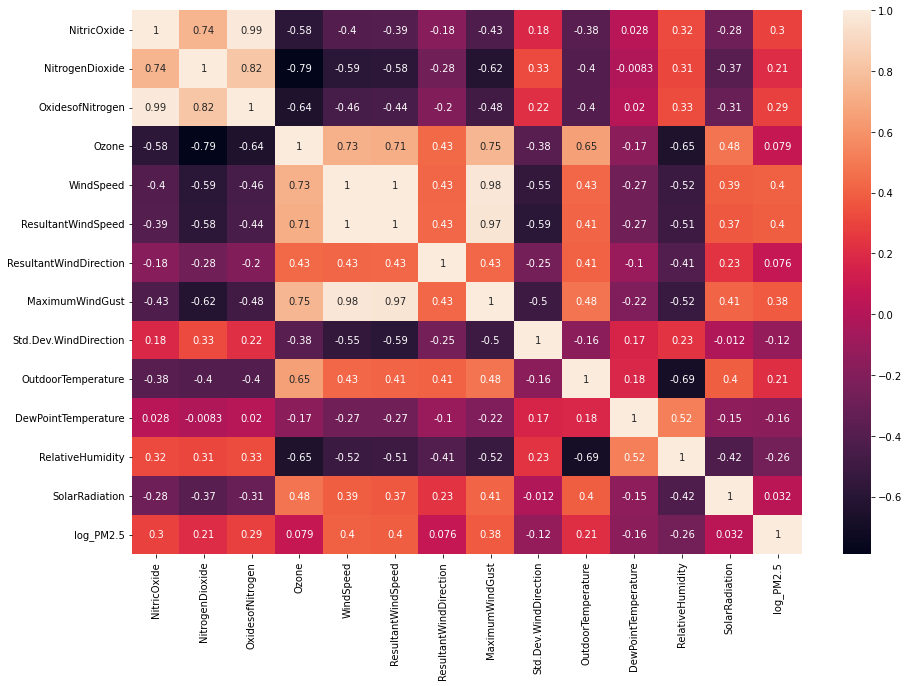

In [ ]:
#Correlation matrix
plt.figure(figsize=(15,10)) #Set figure size

sns.heatmap(df1.corr(), annot=True)

## Pairing Multicolinear Features

In [156]:
correlatedColumns = []
corr = df1.corr()
indices = corr.index
columns = corr.columns
posthreshold = 0.85
negthreshold = -0.85

for c in columns:
    for r in indices:
        if c != r and (corr[c][r] > posthreshold or corr[c][r] < negthreshold):
            correlatedColumns.append({"column" : c , "row" : r , "val" :corr[c][r] })
            
if len(correlatedColumns) < 1: print('No Multicolinearity found in dataset')

else: print(correlatedColumns)


[{'column': 'NitricOxide', 'row': 'OxidesofNitrogen', 'val': 0.9917023020518474}, {'column': 'OxidesofNitrogen', 'row': 'NitricOxide', 'val': 0.9917023020518474}, {'column': 'WindSpeed', 'row': 'ResultantWindSpeed', 'val': 0.9972624762883195}, {'column': 'WindSpeed', 'row': 'MaximumWindGust', 'val': 0.97679608752667}, {'column': 'ResultantWindSpeed', 'row': 'WindSpeed', 'val': 0.9972624762883195}, {'column': 'ResultantWindSpeed', 'row': 'MaximumWindGust', 'val': 0.9678380226767956}, {'column': 'MaximumWindGust', 'row': 'WindSpeed', 'val': 0.97679608752667}, {'column': 'MaximumWindGust', 'row': 'ResultantWindSpeed', 'val': 0.9678380226767956}]


This show the features are higly correlated with another feature
Even the threshold is still a big, a better value will be say 0.60 and below that would yield a better prediction and remove all colinear features

## Alternatively

We can delete the features that are highly correlated from the dataset as and get a cleaner dataset for our use using this snippet of code

In [150]:
# Get correlation matrix 
corr = df1.corr()

# Create a mask for values above 90% 
# But also below 100% since it variables correlated with the same one
mask = (df1.corr() > 0.58) & (df1.corr() < 1.0)
high_corr = corr[mask]

# Create a new column mask using any() and ~
col_to_filter_out = ~high_corr[mask].any()

# Apply new mask
df_clean = df1[high_corr.columns[col_to_filter_out]]

# Visualize cleaned dataset
df_clean.head()

,ResultantWindDirection,Std.Dev.WindDirection,DewPointTemperature,RelativeHumidity,SolarRadiation,log_PM2.5
0,0.594972,0.445946,0.421555,0.138741,0.000000,3.613617
1,0.765363,0.108108,0.544338,0.094984,0.707006,3.711130
2,0.779330,0.081081,0.515689,0.077908,0.535669,3.602777
3,0.782123,0.054054,0.499318,0.073639,0.324204,3.594569
4,0.784916,0.040541,0.283765,0.112060,0.286624,4.188138


### Investigate the distribution of the response

In [18]:
df1['log_PM2.5'].describe()

count    842.000000
mean       2.953747
std        1.080634
min       -2.302585
25%        2.208274
50%        2.965273
75%        3.792111
max        6.126651
Name: log_PM2.5, dtype: float64

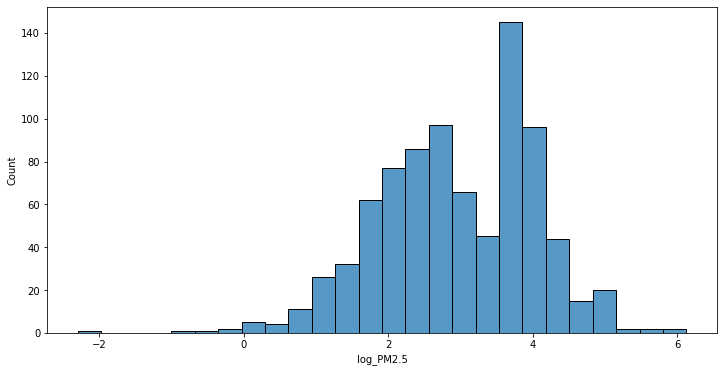

In [19]:
plt.figure(figsize=(12,6))

sns.histplot(x= df1['log_PM2.5'])

#### PM.25 at value -2 happens to be an outlier

Only few log_PM2.5 have values around 6 which is the maximum, more of the values have avg. values of 2.9

Also most values fall within 2-5

We should expect most of our predicted values to lie between a little below the mean and a little above 4.0

Also, it is observed that the features are in different scales, so we need to standardize the data

## Standardize The Data

In [ ]:
df1.columns

Index(['NitricOxide', 'NitrogenDioxide', 'OxidesofNitrogen', 'Ozone',
       'WindSpeed', 'ResultantWindSpeed', 'ResultantWindDirection',
       'MaximumWindGust', 'Std.Dev.WindDirection', 'OutdoorTemperature',
       'DewPointTemperature', 'RelativeHumidity', 'SolarRadiation',
       'log_PM2.5'],
      dtype='object')

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Scaling our columns except the target
scale_vars = ['NitricOxide', 'NitrogenDioxide', 'OxidesofNitrogen', 'Ozone',
       'WindSpeed', 'ResultantWindSpeed', 'ResultantWindDirection',
       'MaximumWindGust', 'Std.Dev.WindDirection', 'OutdoorTemperature',
       'DewPointTemperature', 'RelativeHumidity', 'SolarRadiation']

scaler = MinMaxScaler()
df1[scale_vars] = scaler.fit_transform(df1[scale_vars]) #df1[scale_vars] -> making the array  to a dataframe

df1.head(2)

,NitricOxide,NitrogenDioxide,OxidesofNitrogen,Ozone,WindSpeed,ResultantWindSpeed,ResultantWindDirection,MaximumWindGust,Std.Dev.WindDirection,OutdoorTemperature,DewPointTemperature,RelativeHumidity,SolarRadiation,log_PM2.5
0,0.072750,0.531768,0.161457,0.042254,0.050157,0.047468,0.594972,0.059140,0.445946,0.540264,0.421555,0.138741,0.000000,3.613617
1,0.020037,0.075967,0.022560,0.535211,0.721003,0.715190,0.765363,0.684588,0.108108,0.814056,0.544338,0.094984,0.707006,3.711130


# 2. Linear Regression:

### (a) Fit the full model where the response variable is the log-transformed PM2.5.

In [89]:
X = df1.drop('log_PM2.5', axis = 1).values
X

array([[0.07274969, 0.53176796, 0.16145692, ..., 0.42155525, 0.13874066,
        0.        ],
       [0.02003699, 0.07596685, 0.02256048, ..., 0.54433834, 0.09498399,
        0.70700637],
       [0.01942047, 0.0801105 , 0.02283229, ..., 0.51568895, 0.07790822,
        0.53566879],
       ...,
       [0.00739827, 0.04005525, 0.01032889, ..., 0.60163711, 0.26467449,
        0.36942675],
       [0.01140567, 0.06906077, 0.0187551 , ..., 0.60300136, 0.25933831,
        0.56178344],
       [0.01233046, 0.06906077, 0.01848328, ..., 0.60163711, 0.22732124,
        0.7388535 ]])

In [22]:
y = df1['log_PM2.5']
y

0      3.613617
1      3.711130
2      3.602777
3      3.594569
4      4.188138
         ...   
840    2.701361
841    2.406945
842    2.433613
843    2.312535
844    2.140066
Name: log_PM2.5, Length: 842, dtype: float64

In [47]:
#Split the data into training and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

#Linear Regressors
from sklearn.linear_model import LinearRegression

# Training the Regression
lm = LinearRegression(fit_intercept = True)     #fit_intercept = True => so we can make some predictions later on

lm.fit(X_train, y_train)

LinearRegression()

In [48]:
#Prediction
y_pred = lm.predict(X_train)
y_pred

array([1.93474199, 1.84565729, 2.56709239, 2.30925541, 1.9374249 ,
       2.8571721 , 2.53995073, 2.63096571, 2.22555256, 2.91625182,
       2.21963468, 1.9736382 , 3.57131365, 4.21125058, 4.03386233,
       1.79101987, 2.68005935, 2.51563247, 1.72502996, 4.30316044,
       2.40018519, 2.26066615, 4.28262024, 4.47195686, 3.6801958 ,
       2.31607029, 2.24046501, 4.2017555 , 3.87937052, 2.1825981 ,
       2.73521647, 4.62767116, 1.86422243, 3.06877712, 3.82543403,
       2.46040188, 3.88574808, 1.92877816, 3.02414912, 4.41815469,
       3.49644825, 3.64943703, 1.87260348, 2.4893338 , 2.64643064,
       1.93526341, 3.12823978, 4.1679755 , 2.59292084, 4.09962781,
       2.20901382, 3.89641987, 2.62063417, 2.8031849 , 3.72590942,
       2.09529259, 2.82929855, 2.12583119, 1.35505418, 4.29840548,
       3.16458653, 2.75735972, 3.65498575, 1.59132984, 3.8131529 ,
       2.19558584, 4.01016583, 2.34033562, 2.61717447, 1.7646985 ,
       1.85061337, 3.40907504, 2.24762322, 2.68005935, 2.74741

In [90]:
# Model Accuracy on training dataset
print('The lm.score Accuracy  on the training dataset is: ', lm.score(X_train, y_train)*100 )
print('The r2_score Accuracy  on the training dataset is: ',r2_score(y_train,y_pred)*100 )   

print("")
#Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm.score(X_test, y_test)*100 )

print("")
# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred))*100)
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm.predict(X_test)))*100)

The lm.score Accuracy  on the training dataset is:  58.12998055259635
The r2_score Accuracy  on the training dataset is:  58.12998055259635

The Accuracy  on the testing dataset is:  55.27747251082786

The RMSE  on the training dataset is:  70.32156312420219
The RMSE  on the testing dataset is:  70.12038148514561


###(b) Find the coefficients of the predictors

In [29]:
#Coefficients
lm.coef_ 

array([10.87148945,  3.77717721, -9.97291313, -0.60408975, -1.19470066,
        3.43629743, -0.65043432,  1.66355729,  0.92235832,  1.95905329,
       -1.2081038 ,  0.54614268, -0.45615011])

In [28]:
# The Intercept
print('Intercept: ', lm.intercept_)

Intercept:  1.0363542137524617


### (c) Find the R2 and adjusted R2 and analyze the model.

In [ ]:
# compute with statsmodels, by adding intercept manually
import statsmodels.api as sm
X1 = sm.add_constant(X)
result = sm.OLS(y, X1).fit()

print("R-Squared:" , result.rsquared,end='\n\n')
print("Adjusted-R-Squared", result.rsquared_adj)


R-Squared: 0.5779799596173121

Adjusted-R-Squared 0.5713540411088882


### (d) Check the model assumption (e.g., Normality, Homoscedasticity, Independence, Lin-earity etc.) and make your comments by analyzing the model and data.

#### I) Linearity

Text(0.5, 1.0, 'Actuals Vs Predicted Values')

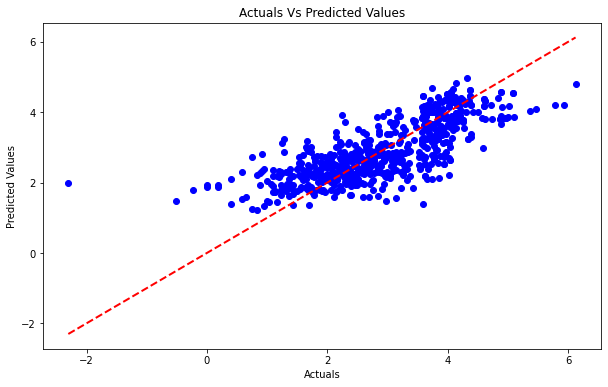

In [158]:
# Plotting Actuals Vs Predicted

plt.figure(figsize=(10,6))

plt.scatter(y_train, y_pred, c='blue')

#fit a linear line on it
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=2)

plt.xlabel('Actuals')
plt.ylabel('Predicted Values')
plt.title('Actuals Vs Predicted Values')

Assumption not satisfied

We can see that there is no perfect linear relationship. Our predictions are biased towards lower values in both the lower end (around 0-1) and especially at the higher values (above 5)

#### 2.Normality Check

In [160]:
res = (y_train-y_pred)

Text(0.5, 1.0, 'Actuals Vs Residuals')

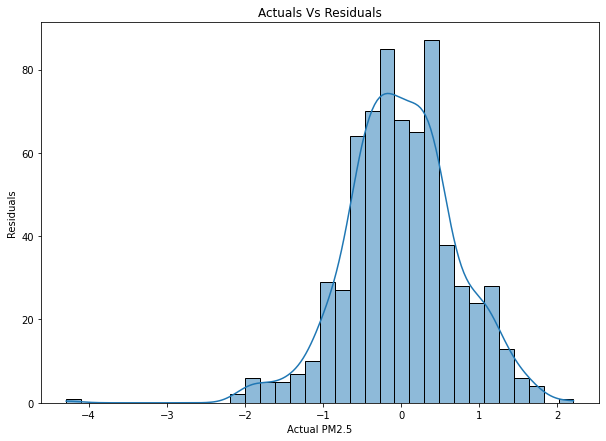

In [165]:
plt.figure(figsize=(10,7))

sns.histplot(data=df1, x=res, kde=True )

plt.xlabel('Actual PM2.5')
plt.ylabel('Residuals')
plt.title('Actuals Vs Residuals')

Assumption not satisfied

Confidence intervals will likely be affected

This isn’t ideal, and we can see that our model is biasing towards the lower part.

#### 3.No Multicollinearity among Predictors

Assumption not satisfied

We have show previously, there is a lot of multicolinearity exhibit

#### 4.Homoscedasticity

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Actuals Vs Residuals')

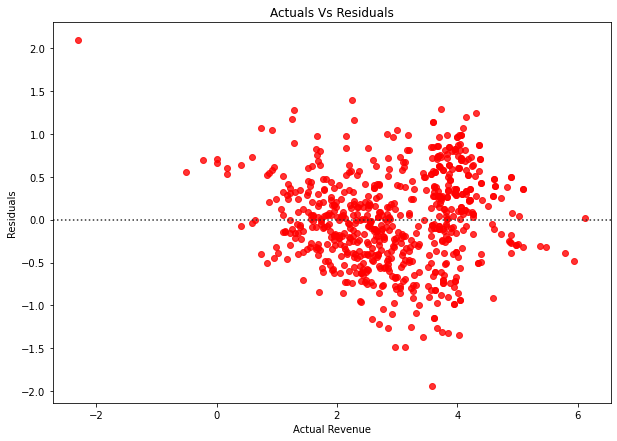

In [164]:
# Ploting Residuals

plt.figure(figsize=(10,7))

sns.residplot(y_train, y_pred, color='red')

plt.xlabel('Actual Revenue')
plt.ylabel('Residuals')
plt.title('Actuals Vs Residuals')

Assumption not satisfied

Since we don’t have an even variance across the error terms.

#### 5. No autocorrelation of residuals

<Figure size 864x432 with 0 Axes>

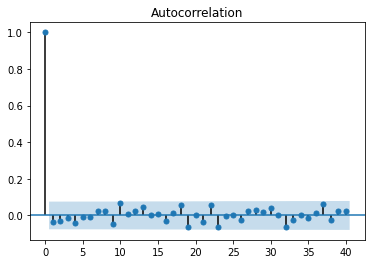

In [169]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(res, lags=40 , alpha=0.05)
acf.show()

Assumption satisfied

No Autocorrelation

### (e) (Outlier detection) Identify outliers that are outlying in terms of predictors and response. Comment on the outlying players.

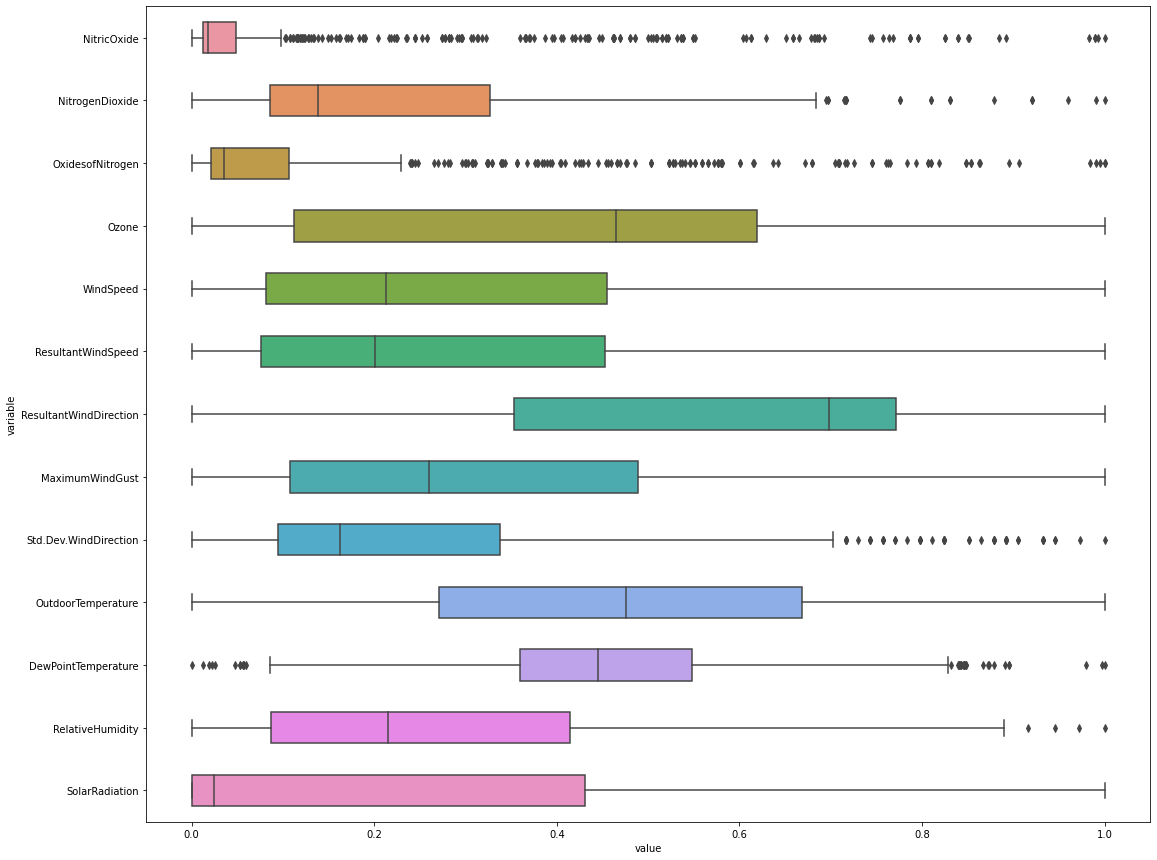

In [ ]:
#Checking Predictors for outliers

plt.figure(figsize=(18,15))

df = pd.DataFrame(data=df1, columns=['NitricOxide', 'NitrogenDioxide', 'OxidesofNitrogen', 'Ozone',
       'WindSpeed', 'ResultantWindSpeed', 'ResultantWindDirection',
       'MaximumWindGust', 'Std.Dev.WindDirection', 'OutdoorTemperature',
       'DewPointTemperature', 'RelativeHumidity', 'SolarRadiation'])

sns.boxplot(y="variable", x="value", data=pd.melt(df), width= 0.5)
plt.show()

These predictors exhibit outliers, and this contributed to the poor model evaluation score

NitricOxide,  'NitrogenDioxide',  Std.Dev.WindDirection, 'OxidesofNitrogen', DewPointTemperature', 'RelativeHumidity

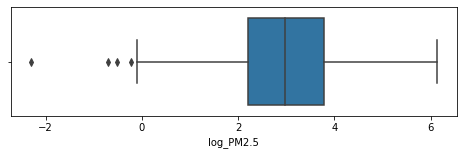

In [ ]:
#Check Response for outlier
plt.figure(figsize=(8,2))
sns.boxplot(x = 'log_PM2.5', data=df1)

The response exhibit outliers below value 0

# 3. Comparison:

### (a) Fit the model where the predictors are NitrogenDioxide, ResultantWindSpeed, Re-sultantWindDirection, MaximumWindGust, Std.Dev.WindDirection, OutdoorTem-perature, DewPointTemperature, and SolarRadiation.

In [82]:
df2 = df1[['NitrogenDioxide', 'ResultantWindSpeed', 'ResultantWindDirection','MaximumWindGust',
          'Std.Dev.WindDirection','OutdoorTemperature','DewPointTemperature', 'SolarRadiation']]

In [83]:
df2.head()

,NitrogenDioxide,ResultantWindSpeed,ResultantWindDirection,MaximumWindGust,Std.Dev.WindDirection,OutdoorTemperature,DewPointTemperature,SolarRadiation
0,0.531768,0.047468,0.594972,0.059140,0.445946,0.540264,0.421555,0.000000
1,0.075967,0.715190,0.765363,0.684588,0.108108,0.814056,0.544338,0.707006
2,0.080110,0.734177,0.779330,0.718638,0.081081,0.825769,0.515689,0.535669
3,0.078729,0.781646,0.782123,0.745520,0.054054,0.818448,0.499318,0.324204
4,0.135359,0.781646,0.784916,0.752688,0.040541,0.421669,0.283765,0.286624


In [ ]:
type(df2)

pandas.core.frame.DataFrame

In [91]:
X2 =  df2.values
y2 = df1['log_PM2.5']

In [ ]:
type(X2)

numpy.ndarray

In [92]:
#Split the data into training and testing set
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, train_size=0.80, test_size = 0.2, random_state=15)

# Training the Regression
lm2 = LinearRegression(fit_intercept = True)     
lm2.fit(X_train2, y_train2)

#Prediction
y_pred2 = lm2.predict(X_train2)

In [86]:
y_pred2

array([1.9715137 , 1.93967124, 2.39381153, 2.12456593, 1.94290168,
       2.77385067, 2.78228394, 2.4099519 , 2.53071115, 2.68038556,
       2.46563937, 1.97645227, 3.45002178, 4.08842964, 3.95832668,
       1.89175732, 3.03416596, 2.75341879, 1.99694993, 3.99556596,
       2.70125665, 2.34966081, 3.51475325, 4.37684889, 3.80056176,
       2.42132656, 2.26591774, 4.2106148 , 3.83612632, 2.32072617,
       2.63357683, 3.63344802, 1.84671929, 3.17324133, 3.97795383,
       2.39009014, 4.10714267, 2.11462969, 3.3433881 , 4.4176614 ,
       3.98673367, 3.38770236, 1.90818802, 2.44790499, 2.67606727,
       1.84839397, 2.88380837, 3.57401145, 2.68248341, 3.78894154,
       2.19952797, 4.28639432, 2.7987379 , 3.24945527, 3.57414818,
       2.30342197, 2.73449958, 2.24890524, 1.53993075, 3.12889151,
       3.04315975, 2.8334164 , 3.90329242, 1.77189517, 3.53558065,
       2.33842723, 3.50577597, 2.55186271, 2.74024982, 1.76109301,
       1.96634257, 3.58167006, 2.44754773, 3.03416596, 2.76976

In [93]:
# Model Accuracy on training dataset
print('The lm.score Accuracy  on the training dataset is: ', lm2.score(X_train2, y_train2)*100 )
print('The r2_score Accuracy  on the training dataset is: ',r2_score(y_train2,y_pred2)*100 )   

print("")
#Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm2.score(X_test2, y_test2)*100 )

print("")
# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train2,y_pred2))*100)
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test2,lm2.predict(X_test2)))*100)

The lm.score Accuracy  on the training dataset is:  52.24852170221076
The r2_score Accuracy  on the training dataset is:  52.24852170221076

The Accuracy  on the testing dataset is:  54.36106324048631

The RMSE  on the training dataset is:  75.09834133112138
The RMSE  on the testing dataset is:  70.83515677477938


(b) Is there any multicollinearity issue with the predictors? If yes, report the variables having multicollinearity issue. Would you consider removing these variables from your fitted model? Why? Justify your answer.

In [147]:
correlatedColumns = []
corr = df2.corr()
indices = corr.index
columns = corr.columns
posthreshold = 0.67
negthreshold = -0.67

for c in columns:
    for r in indices:
        if c != r and (corr[c][r] > posthreshold or corr[c][r] < negthreshold):
            correlatedColumns.append({"column" : c , "row" : r , "val" :corr[c][r] })
            
if len(correlatedColumns) < 1: print('No Multicolinearity in dataset')

else: print(correlatedColumns)

[{'column': 'ResultantWindSpeed', 'row': 'MaximumWindGust', 'val': 0.9678380226767956}, {'column': 'MaximumWindGust', 'row': 'ResultantWindSpeed', 'val': 0.9678380226767956}]


There is multicolinearity issues with the following pairs of predictors

{NitrogenDioxide' - 'MaximumWindGust}

{ResultantWindSpeed', - 'MaximumWindGust}

{'MaximumWindGust' - 'NitrogenDioxide'}

{'MaximumWindGust'-'ResultantWindSpeed'}

**I will consider removing one of these features in the highly correlated pairs so that the lm.score accuracy could improve as seen in the lm3 model that I did in 3(c)**

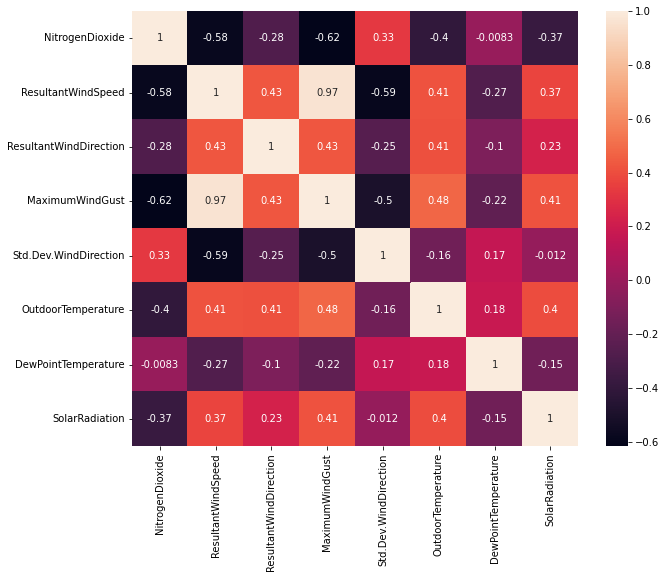

In [148]:
#Correlation matrix
plt.figure(figsize=(10,8)) #Set figure size

sns.heatmap(df2.corr(), annot=True)

### (c) Compare the models of part 2(a) and part 3(a) and conclude which model is better for prediction and why?

The first model still wins despite several multicolinearity issues in both models

However, there seems to be no much difference in the accuracy score of both models.

This could be due to noisy outliers and huge amount of multicolinearity present in both models

We expected model 2 to perform better, but it doesn't

I will get a more cleaner predictors as follows and re-run the model evaluation to see what happens

In [151]:
# Get correlation matrix 
corr = df1.corr()

# Create a mask for values above 50% 
# But also below 100% since it variables correlated with the same one
mask = (df1.corr() > 0.59) & (df1.corr() < 1.0)
high_corr = corr[mask]

# Create a new column mask using any() and ~
col_to_filter_out = ~high_corr[mask].any()

# Apply new mask
df_clean = df1[high_corr.columns[col_to_filter_out]]

# Visualize cleaned dataset
df_clean.head()

,ResultantWindDirection,Std.Dev.WindDirection,DewPointTemperature,RelativeHumidity,SolarRadiation,log_PM2.5
0,0.594972,0.445946,0.421555,0.138741,0.000000,3.613617
1,0.765363,0.108108,0.544338,0.094984,0.707006,3.711130
2,0.779330,0.081081,0.515689,0.077908,0.535669,3.602777
3,0.782123,0.054054,0.499318,0.073639,0.324204,3.594569
4,0.784916,0.040541,0.283765,0.112060,0.286624,4.188138


In [155]:
#Multicolinearity check
correlatedColumns = []
corr = df_clean.corr()
indices = corr.index
columns = corr.columns
posthreshold = 0.59
negthreshold = -0.59

for c in columns:
    for r in indices:
        if c != r and (corr[c][r] > posthreshold or corr[c][r] < negthreshold):
            correlatedColumns.append({"column" : c , "row" : r , "val" :corr[c][r] })

if len(correlatedColumns) < 1: print('No Multicolinearity found in dataset')

else: print(correlatedColumns)

No Multicolinearity found in dataset


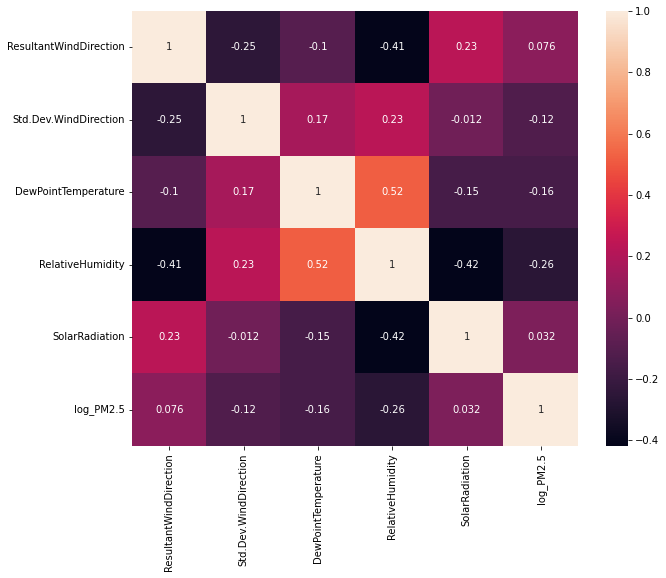

In [132]:
#Correlation matrix
plt.figure(figsize=(10,8)) #Set figure size

sns.heatmap(df_clean.corr(), annot=True)

In [134]:
X3 = df_clean.values
y3 = df_clean['log_PM2.5']

In [135]:
#Split the data into training and testing set
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, train_size=0.80, test_size = 0.2, random_state=15)

# Training the Regression
lm3 = LinearRegression(fit_intercept = True)     
lm3.fit(X_train3, y_train3)

#Prediction
y_pred3 = lm3.predict(X_train3)

In [136]:
# Model Accuracy on training dataset
print('The lm.score Accuracy  on the training dataset is: ', lm3.score(X_train3, y_train3)*100 )
print('The r2_score Accuracy  on the training dataset is: ',r2_score(y_train3,y_pred3)*100 )   

print("")
#Model Accuracy on testing dataset
print('The Accuracy  on the testing dataset is: ', lm3.score(X_test3, y_test3)*100 )

print("")
# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train3,y_pred3))*100)
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test3,lm3.predict(X_test3)))*100)

The lm.score Accuracy  on the training dataset is:  100.0
The r2_score Accuracy  on the training dataset is:  100.0

The Accuracy  on the testing dataset is:  100.0

The RMSE  on the training dataset is:  7.486421278017294e-14
The RMSE  on the testing dataset is:  7.090579376043252e-14


We can see after proper filtering, the most effective underlying predictors that yielded the best  performance of the model are as follow:

**[ResultantWindDirection,	Std.Dev.WindDirection,	DewPointTemperature	RelativeHumidity,	SolarRadiation]**

We obtain a 100% accuracy and an insignificant amont of RMSE

As seen from the correlation matrix plot and the snipet code checking for correlations, there is no any form of multicolinearity among those predictors



If we compare the correlation values among these predictors-pairs as seen in the correlation matrix plot, this is far better than the correlations among the the predictors in lm2 that yeilded multicolinearity bamong lm2 predictors :

{NitrogenDioxide' - 'MaximumWindGust}

{ResultantWindSpeed', - 'MaximumWindGust}

{'MaximumWindGust' - 'NitrogenDioxide'}

{'MaximumWindGust'-'ResultantWindSpeed'}